In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('housing_sale_cleaned.csv')

In [3]:
df.head()
df.dtypes


house_price         int64
house_location     object
no_bedrooms         int64
no_washrooms        int64
house_type         object
date_renewed       object
total_views         int64
house_town_name    object
house_area_name    object
dtype: object

In [4]:
df1 = df.drop(columns= ['house_location','date_renewed','house_town_name','house_area_name','house_type'])

In [5]:
df1.shape

(1756, 4)

In [6]:
#removing outliers
df1 = df1[df1.house_price<=1000000]
df1 = df1[df1.no_bedrooms<=7]
df1 = df1[df1.no_washrooms<=7]

In [7]:
sns.pairplot(df1,height=3)
plt.tight_layout()

In [9]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [8]:
prices = df1['total_views']
features = df1.drop('total_views',axis = 1)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

# Training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state = 42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    regressor = DecisionTreeRegressor()

    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    scoring_fnc = make_scorer(performance_metric)

    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    grid = grid.fit(X, y)

    return grid.best_estimator_

In [12]:
reg = fit_model(X_train, y_train)

print("max_depth is {} for the best model.".format(reg.get_params()['max_depth']))

max_depth is 1 for the best model.


In [13]:
#R Square value:
reg.score(X_train,y_train)

0.006709309869175839

In [18]:
df1

house_price  no_bedrooms  no_washrooms  total_views
0          750000            4             3          702
1          650000            4             2          309
2          750000            4             1         3825
3          595000            4             3         2318
4          315000            3             3         3965
5          495000            4             2         4274
6          395000            3             1         4273
7          210000            1             1         1204
8          375000            2             1         4606
9          670000            3             1          987
10         175000            2             1         2367
11         625000            3             3         3777
12         560000            4             3         1857
13         225000            2             2         1543
14         375000            3             1         3633
15         395000            3             2         3022
17         360000            2             1         2133
18         895000            4             3         5633
19         650000            3             1         2369
20         265000            2             2         3192
21         365000            2             1         1455
26         395000            3             2         4102
27         825000            4             3         2924
28         650000            5             2         2255
29         795000            4             3         7048
30         300000            2             2         6222
31         490000            2             2         1565
32         275000            1             1         2580
33         450000            2             3        13219
34         305000            3             3         5127
...           ...          ...           ...          ...
1725       390000            3             2         2702
1726       695000            4             3         1714
1727       275000            3             1         2600
1728       435000            3             1         1478
1729       300000            3             3         5390
1730       395000            2             2         1049
1731       445000            3             2         1379
1732       240000            1             1         2433
1733       350000            2             1         1921
1734       299000            2             2         1427
1735       595000            4             3         1789
1736       275000            2             2         1527
1737       560000            4             3         1226
1738       219000            2             1         2092
1739       895000            5             4         2150
1740       665000            4             2         1135
1742       225000            3             1         1134
1743       385000            2             2         1360
1744       245000            5             3         3282
1745       550000            4             2         1035
1746       250000            2             1         1170
1747       390000            3             1         1416
1748       495000            3             3         2384
1749       249950            2             1         1196
1750       815000            3             2         1460
1751       349950            2             1         1312
1752       380000            3             3         1398
1753       259000            3             2         1592
1754       485000            3             2         1620
1755       185000            1             1         2080

[1692 rows x 4 columns]

In [20]:
new_input = [[750000, 4,2],
            [150000, 2,1],
             [550000, 5,3]]

for i, price in enumerate(reg.predict(new_input)):
    print("Expected views on Client's ad : {}".format(i+1, price))

Expected views on Client's ad : 1
Expected views on Client's ad : 2
Expected views on Client's ad : 3


Training and testing split was successful.
   house_price  no_bedrooms  no_washrooms  total_views  area_code  town_code  \
0       750000            4             3          702         18        219   
1       650000            4             2          309          4        220   
2       750000            4             1         3825          6        186   
3       595000            4             3         2318          0        142   
4       315000            3             3         3965          0        140   

   house_type_code  
0                2  
1                1  
2                5  
3                5  
4                5  


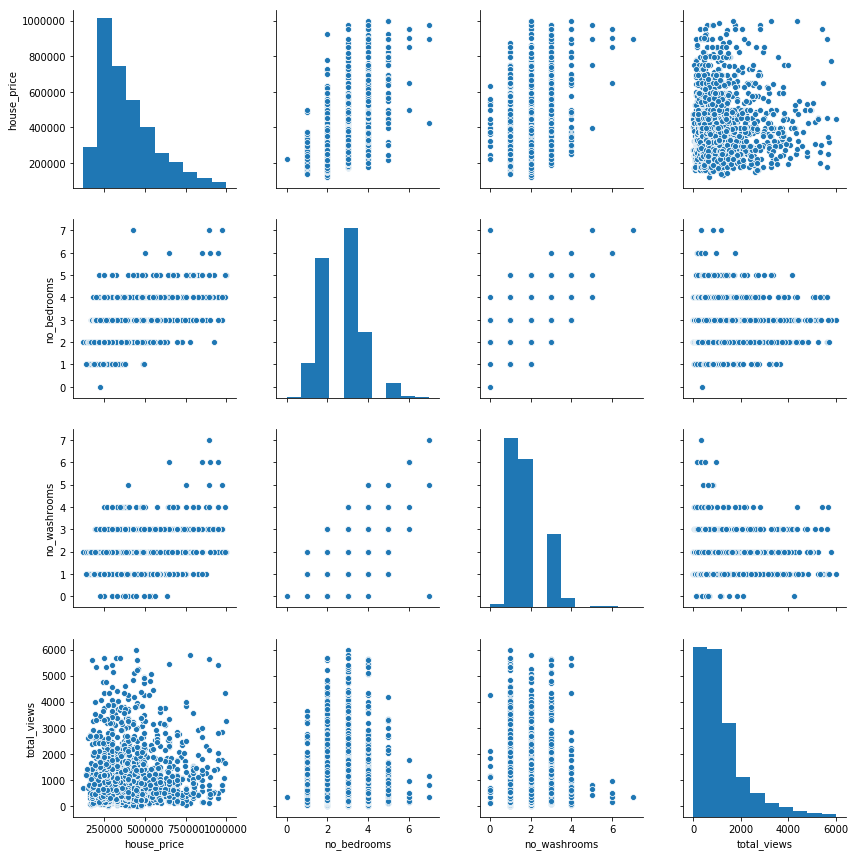

In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
import json
import pickle
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit




df1 = pd.read_csv('housing_sale_cleaned.csv')
for i, rows in df1.iterrows():
    df1.at[i,'house_area_name'] = df1.at[i,'house_area_name'].strip()
    df1.at[i,'house_town_name'] = df1.at[i,'house_town_name'].strip()
    df1.at[i,'house_type'] = df1.at[i,'house_type'].strip()

df1["house_area_name"] = df1["house_area_name"].str.replace("Dublin 6w","Dublin 6")

df1 = df1[df1.total_views<=6000]

df1 = df1[df1.house_price<=1000000]
df1 = df1[df1.no_bedrooms<=7]
df1 = df1[df1.no_washrooms<=7]
for i, rows in df1.iterrows():
    df1.at[i,'house_area_name'] = df1.at[i,'house_area_name'].strip()
    df1.at[i,'house_town_name'] = df1.at[i,'house_town_name'].strip()
    df1.at[i,'house_type'] = df1.at[i,'house_type'].strip()

df1_encoded = df1.copy()
label_make1 = LabelEncoder()
label_make2 = LabelEncoder()
label_make3 = LabelEncoder()
df1_encoded['area_code'] = label_make1.fit_transform(df1['house_area_name'])
df1_encoded['town_code'] = label_make2.fit_transform(df1['house_town_name'])
df1_encoded['house_type_code'] = label_make3.fit_transform(df1['house_type'])


df1_encoded_test = df1_encoded.drop(columns= ['house_location','date_renewed','house_town_name','house_area_name','house_type'])

sns.pairplot(df1,height=3)
plt.tight_layout()


# In[9]:




def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)

    # Return the score
    return score


# In[8]:


prices = df1_encoded_test['total_views']
features = df1_encoded_test.drop('total_views',axis = 1)


# In[10]:



# Training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state = 42)

# Success
print("Training and testing split was successful.")

print df1_encoded_test.head()
# In[11]:


In [18]:
df1_encoded_test.shape
corrmat = df1_encoded_test.corr()
k = 7 #number of variables for heatmap
cols = corrmat.nlargest(k, 'total_views')['total_views'].index
cm = np.corrcoef(df1_encoded[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [16]:
def fit_model(X, y):

    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    regressor = DecisionTreeRegressor()

    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    scoring_fnc = make_scorer(performance_metric)

    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    grid = grid.fit(X, y)

    return grid.best_estimator_


# In[12]:


reg = fit_model(X_train, y_train)

print("max_depth is {} for the best model.".format(reg.get_params()['max_depth']))


reg.score(X_train,y_train)


new_input = [[750000, 4,3,702,18,223],
            [10000, 4,2,309,4,224]]

for i, price in enumerate(reg.predict(new_input)):
    print("Expected views on Client's ad : {:d}".format(int(price)))
print("WHAT THE FUCK")

max_depth is 2 for the best model.
Expected views on Client's ad : 1674
Expected views on Client's ad : 1674
WHAT THE FUCK
